In [1]:
import textwrap
from os import mkdir
from pathlib import Path
from pprint import pprint

import brightway2 as bw
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import productivity_boosters as prbs
from matplotlib.ticker import (  # ScalarFormatter,; FixedFormatter,; NullFormatter,
    FixedLocator,
    LogLocator,
    MultipleLocator,
)
from project_path import ROOT_DIR

plt.style.use("default")

In [2]:
bw.projects
bw.projects.set_current("GAC_project")
bw.databases

Databases dictionary with 3 object(s):
	GAC_project_db
	biosphere3
	ei39cutoff

In [3]:
ipcc_methods = [
    met
    for met in bw.methods
    if "ipcc 2021" in str(met).lower()
    and "climate change: including SLCFs" in str(met)
    and "no LT" not in str(met)
    and "GWP100" in str(met)
    or ("ipcc 2013" in str(met).lower() and "no LT" not in str(met) and "GWP100" in str(met))
    # or ("ipcc 2021" in str(met).lower() and "no LT" not in str(met) and "GWP100" in str(met))
][1]# [:2]
ipcc_methods


('IPCC 2021',
 'climate change: including SLCFs',
 'global warming potential (GWP100)')

In [4]:
DB_NAME = "GAC_project_db"

In [5]:
hetero_system = [
    ds
    for ds in bw.Database(DB_NAME)
    if "1-(naphthalen-1-yl)-1H-imidazole" in ds["name"] and "Cu/PCN" in ds["name"]
][0]
hetero_system

'1-(naphthalen-1-yl)-1H-imidazole production with heterogeneous Cu/PCN catalyst (10.8 wt% Cu)' (kilogram, GLO, None)

In [6]:
homoge_system = [
    ds
    for ds in bw.Database(DB_NAME)
    if "1-(naphthalen-1-yl)-1H-imidazole" in ds["name"]
    and "Cu2O/Altman-Buchwald-ligand" in ds["name"]
][0]
homoge_system

'1-(naphthalen-1-yl)-1H-imidazole production with homogeneous Cu2O/Altman-Buchwald-ligand catalytic complex' (kilogram, GLO, None)

In [7]:
bw.calculation_setups

CalculationSetups dictionary with 5 object(s):
	catalysts_only
	contrib
	solveLCA
	solveLCA_scenarios
	trial

In [8]:
result = prbs.pretty_lca(FUs=[{hetero_system: 1}, {homoge_system: 1}], methods=[ipcc_methods], setup_name="solveLCA")

Duration: 0:00:00.900685


In [9]:
result

,database,activity name,reference product,unit,location,IPCC 2021 - climate change: including SLCFs - global warming potential (GWP100) (kg CO2-Eq)
0,GAC_project_db,1-(naphthalen-1-yl)-1H-imidazole production wi...,1-(naphthalen-1-yl)-1H-imidazole,kilogram,GLO,5.609766
1,GAC_project_db,1-(naphthalen-1-yl)-1H-imidazole production wi...,1-(naphthalen-1-yl)-1H-imidazole,kilogram,GLO,70.332673


In [10]:
result_plot = result.iloc[:, [1, 5]]
result_plot["activity name"] = result_plot["activity name"].replace(
    {
        result_plot["activity name"][0]: "heterogeneous",
        result_plot["activity name"][1]: "homogeneous",
    }
)
result_plot


C:\Users\vtulus\AppData\Local\Temp\ipykernel_24772\3935057251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_plot["activity name"] = result_plot["activity name"].replace(


,activity name,IPCC 2021 - climate change: including SLCFs - global warming potential (GWP100) (kg CO2-Eq)
0,heterogeneous,5.609766
1,homogeneous,70.332673


In [11]:
pngFilesDir = Path(ROOT_DIR, r"data/interim/png_files") # full path to folder w/png files
svgFilesDir = Path(ROOT_DIR, r"data/interim/svg_files") # full path to folder w/svg files

# Generate required folders if needed
if not Path.exists(pngFilesDir):
    mkdir(pngFilesDir)
if not Path.exists(svgFilesDir):
    mkdir(svgFilesDir)

Preliminary colors:<br>

<b style="background-color: #ef8a62;">heterogeneous</b><br>  
<b style="background-color: #67a9cf;">homogeneous</b><br>



In [12]:
## BAR CHART colors

allcolors = {
    "heterogeneous": "#ef8a62",
    "homogeneous": "#67a9cf",
}


C:\Users\vtulus\AppData\Local\Temp\ipykernel_24772\1527021583.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(result_plot["activity name"], rotation=-90, va="center")


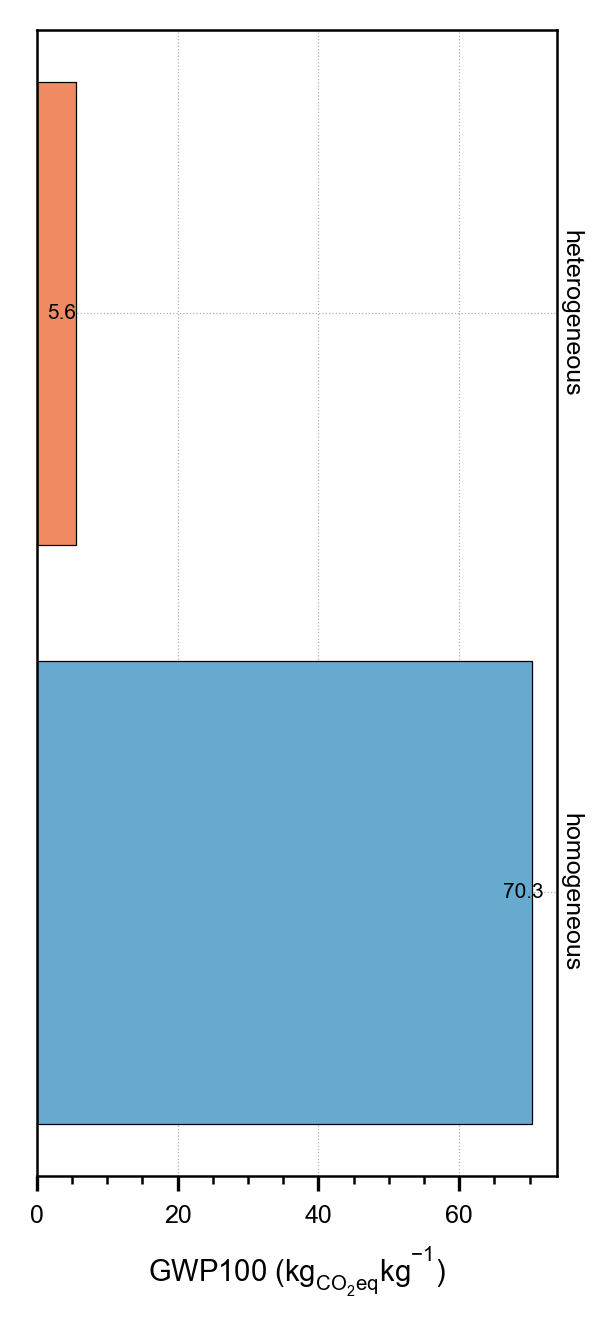

In [13]:
# Plot

# Figure specifications (fonts, sizes, figsize, etc.)
size_legend_font = 8
size_tick_font = 6
size_label_font = 7
mpl.rc("xtick", labelsize=size_tick_font)
mpl.rc("ytick", labelsize=size_tick_font)
mpl.rc("axes", labelsize=size_label_font, linewidth=0.6)
mpl.rc("font", family="Arial")
mpl.rc("mathtext", default="regular")
# mpl.rc('lines', )
# mpl.rc('markers', )
marker_style = dict(lw=0, marker="D", ms=1.5, mec="r", mfc="none", mew=0.7)

# Size of the figure
size_in_mm = (50, 110)  # input the desired size in mm (width, height)

# Variables to define figure's empty space from its borders to the spines of the axes
from_left = 2  # in mm
from_right = 4  # in mm
from_bottom = 11  # in mm
from_top = 2  # in mm

fig = plt.figure(
    figsize=[x / 25.4 for x in size_in_mm],
    dpi=300,
    #  tight_layout = {'pad': 0}
)

gs = fig.add_gridspec(
    nrows=1,
    ncols=1,
    #     width_ratios=[1, 1, 1],
    # height_ratios=[0.86, 0.16],
    #     wspace=0.15,
    # hspace=0.005,
    top=1 - from_top / size_in_mm[1],
    bottom=from_bottom / size_in_mm[1],
    left=from_left / size_in_mm[0],
    right=1 - from_right / size_in_mm[0],
)

ax = fig.add_subplot(gs[0])

## BAR CHART ################################################################
height = 0.8  # the height of the bars (thickness)
bars = ax.barh(
    y=result_plot.iloc[:, 0],
    width=result_plot.iloc[:, 1],
    height=height,
    color=[v for v in allcolors.values()],
    edgecolor="k",
    linewidth=0.3,
)

ax.bar_label(bars, fmt="%.1f", padding=-7, fontsize=5)

ax.yaxis.set_ticklabels(result_plot["activity name"], rotation=-90, va="center")
ax.tick_params(
    axis="y", which="major", length=0.001, pad=-131
)  # almost invisible, pad = separation of text from axis

ax.set_xlabel("GWP100 ($kg_{CO_{2}eq} kg^{-1}$)")
ax.grid(True)
ax.xaxis.grid(True, ls=":", lw=0.3)
ax.yaxis.grid(True, ls=":", lw=0.3)
ax.invert_yaxis()
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.set_axisbelow(True)

figNamePNG = "LCAscore_total_barplot.png"
figNameSVG = "LCAscore_total_barplot.svg"

plt.savefig(str(pngFilesDir / figNamePNG))  # export fig as png
plt.savefig(str(svgFilesDir / figNameSVG))  # export fig as svg